<a href="https://colab.research.google.com/github/00000012-x/github_capstoneProject/blob/main/Initial_Result_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/sample_data/MyDrive/Dataset/Compiled_COVID-19_Case_Details_(Canada).csv')

In [ ]:
df.shape

(106374, 13)

In [ ]:
df.columns

Index(['ObjectId', 'row_id', 'date_reported', 'health_region', 'age_group',
       'gender', 'exposure', 'case_status', 'latitude', 'longitude',
       'province', 'province_abbr', 'hr_uid'],
      dtype='object')

In [ ]:
print(df.dtypes)

ObjectId           int64
row_id             int64
date_reported     object
health_region     object
age_group         object
gender            object
exposure          object
case_status       object
latitude         float64
longitude        float64
province          object
province_abbr     object
hr_uid           float64
dtype: object


checking the dataset for an missing varuables

In [ ]:
df.isna().any().any()

True

In [ ]:
df.isnull().sum()

ObjectId         0
row_id           0
date_reported    0
health_region    0
age_group        1
gender           1
exposure         1
case_status      1
latitude         1
longitude        1
province         1
province_abbr    1
hr_uid           1
dtype: int64

In [ ]:
# Fill missing values with the mean for numerical columns
df['latitude'].fillna(df['latitude'].mean(), inplace=True)
df['longitude'].fillna(df['longitude'].mean(), inplace=True)

# Fill missing values with the mode for categorical column
df['hr_uid'].fillna(df['hr_uid'].mode().iloc[0], inplace=True)

 Regarding why mean is used for numerical columns instead of median, it's a matter of choice and context


In [ ]:
df.isnull().sum()

ObjectId         0
row_id           0
date_reported    0
health_region    0
age_group        1
gender           1
exposure         1
case_status      1
latitude         0
longitude        0
province         1
province_abbr    1
hr_uid           0
dtype: int64

checking for any duplicates

In [ ]:
df.drop_duplicates(inplace=True)

Compute descriptive statistics

In [ ]:
df.describe()

,ObjectId,row_id,latitude,longitude,hr_uid
count,106374.000000,106374.000000,106374.000000,106374.000000,106374.000000
mean,53187.500000,53195.020719,43.876633,-79.594186,3555.570694
std,30707.673105,30722.434152,0.999811,1.743926,15.128585
min,1.000000,0.000000,42.156423,-92.553456,3526.000000
25%,26594.250000,26593.250000,43.512097,-79.890508,3551.000000
50%,53187.500000,53186.500000,43.761613,-79.813571,3553.000000
75%,79780.750000,79779.750000,44.074977,-79.389558,3566.000000
max,106374.000000,107499.000000,52.397247,-74.952579,3595.000000


Visualize distributions

In [ ]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

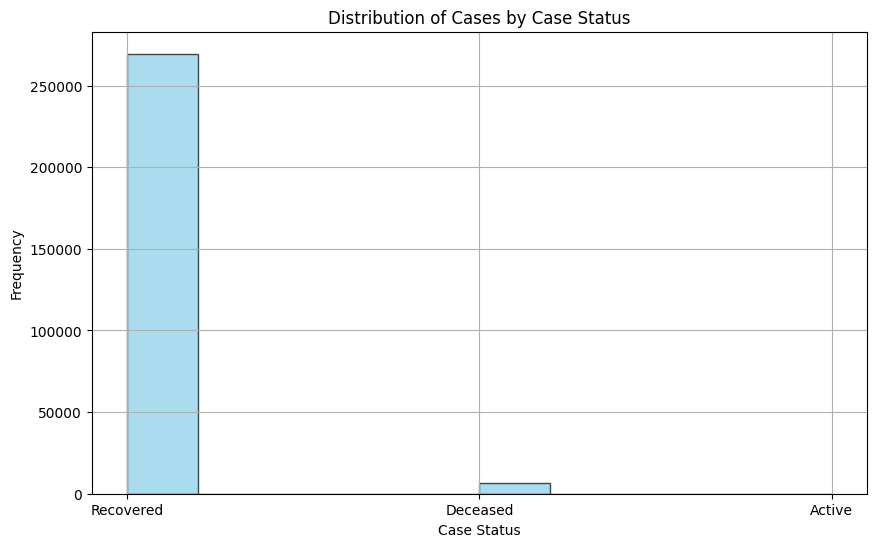

In [ ]:
# Load the dataset into a DataFrame
file_path = '/content/sample_data/MyDrive/Dataset/Compiled_COVID-19_Case_Details_(Canada).csv'
covid_data = pd.read_csv(file_path)

# Plot the distribution of cases based on the 'case_status' column
plt.figure(figsize=(10, 6))
plt.hist(covid_data['case_status'], color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Case Status')
plt.ylabel('Frequency')
plt.title('Distribution of Cases by Case Status')
plt.grid(True)

In [ ]:
# Checking the number of cases in each type

df['case_status'].value_counts()

Recovered    102894
Deceased       3476
Active            3
Name: case_status, dtype: int64

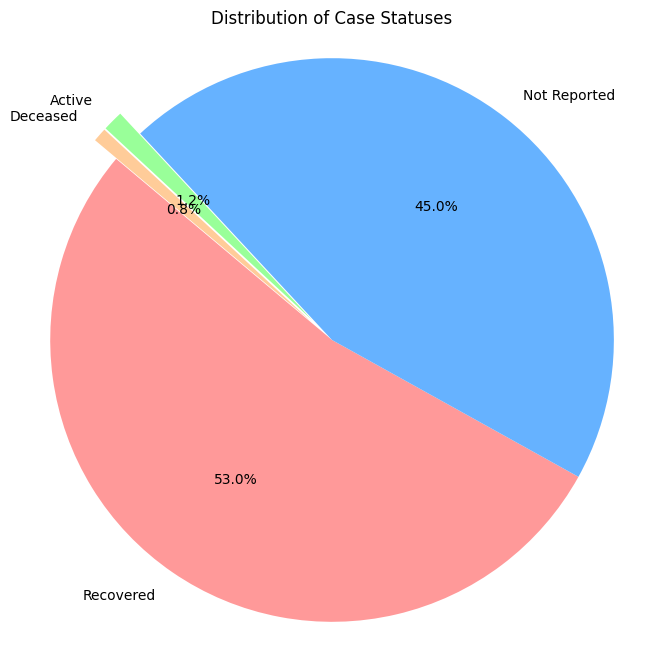

In [ ]:
# Counts of each case status
counts = [734591, 622992, 16266, 11032]

# Labels for the case statuses
labels = ['Recovered', 'Not Reported', 'Active', 'Deceased']

# Colors for the pie chart
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

# Explode a slice if it is 'Active' or 'Deceased'
explode = (0, 0, 0.1, 0.1)

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Case Statuses')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Showing the pie chart
plt.show()

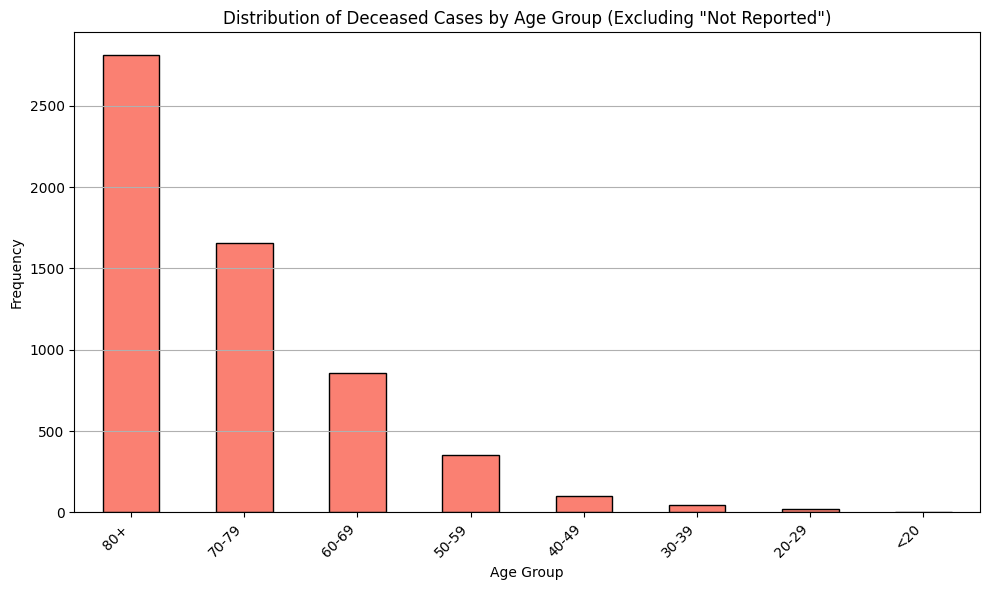

In [ ]:
# Load the dataset into a DataFrame
file_path = '/content/sample_data/MyDrive/Dataset/Compiled_COVID-19_Case_Details_(Canada).csv'
covid_data = pd.read_csv(file_path)

# Filter the DataFrame for deceased cases and exclude 'Not Reported' age group
deceased_data = covid_data[(covid_data['case_status'] == 'Deceased') & (covid_data['age_group'] != 'Not Reported')]

# Plot the distribution of deceased cases based on the 'age_group' column
plt.figure(figsize=(10, 6))
deceased_data['age_group'].value_counts().plot(kind='bar', color='salmon', edgecolor='black')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Distribution of Deceased Cases by Age Group (Excluding "Not Reported")')
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
# Filter the DataFrame for deceased cases and exclude 'Not Reported' age group
deceased_data = df[(df['case_status'] == 'Deceased') & (df['age_group'] != 'Not Reported')]

# Check the distribution of deceased cases by age group
deceased_by_age = deceased_data['age_group'].value_counts()
print(deceased_by_age)

80+      1279
70-79     635
60-69     272
50-59     103
40-49      30
30-39      10
20-29       5
Name: age_group, dtype: int64
